### Game of Thrones

We've all been there: you see a familiar face watching a random show on television or you see a British actor's picture on a movie poster and you think, "wait, who were they on Game of Thrones?"

Thankfully, there's now a better way to sort this out that arguing with your spouse who insists that Tilda Swinton plays Cersei (she doesn't) or desperately searching through HBO promotional photos on Google.

This notebook is where I'll build the model for my web app where you can upload an actor's photo to a website, and get an answer about who they play on _Game of Thrones_ and their character's backstory.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here's what I want in the csv:
- Character name
- Character description
- url for actor's photo

In [2]:
from pathlib import *
from bs4 import BeautifulSoup as bsoup
import re
import requests


In [3]:
url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_characters"
char_class = "mw-headline" #<span class="mw-headline" id="Arya_Stark">Arya Stark</span>
char_desc_class = "hatnote navigation-not-searchable" # character descriptions in next <p> tag

In [4]:
html_doc = requests.get(url)

In [5]:
soup = bsoup(html_doc.text, 'html.parser')

First, I'll create a list of main characters to run the photo download with.

In [6]:
headlines = soup.find_all('h3')
main_cast_list = []
for h in headlines:
    h = h.text
    square_idx = h.find('[')
    name = h.lower()[:square_idx].replace(" ", "_").replace("'", "")
    if 'cast' not in name:
        if 'stark' in name and '"' in name:
            n = re.findall(r'"([^"]*)"', name)
            main_cast_list.append(re.findall(r'"([^"]*)"', name)[0] + '_stark')
        elif '"' in name:
            main_cast_list.append(re.findall(r'"([^"]*)"', name)[0])
        else:
            main_cast_list.append(name)

This gives us a results object - grab main cast names

In [7]:
print(main_cast_list)

['ned_stark', 'robert_baratheon', 'jaime_lannister', 'catelyn_stark', 'cersei_lannister', 'daenerys_targaryen', 'jorah_mormont', 'viserys_targaryen', 'jon_snow', 'sansa_stark', 'arya_stark', 'robb_stark', 'theon_greyjoy', 'bran_stark', 'joffrey_baratheon', 'the_hound', 'tyrion_lannister', 'littlefinger', 'davos_seaworth', 'samwell_tarly', 'stannis_baratheon', 'melisandre', 'jeor_mormont', 'bronn', 'varys', 'shae', 'margaery_tyrell', 'tywin_lannister', 'talisa_maegyr', 'ygritte', 'gendry', 'tormund_giantsbane', 'brienne_of_tarth', 'ramsay_bolton', 'gilly', 'daario_naharis', 'missandei', 'ellaria_sand', 'tommen_baratheon', 'jaqen_hghar', 'roose_bolton', 'the_high_sparrow', 'house_arryn', 'house_baratheon', 'house_bolton', 'house_frey', 'house_greyjoy', 'house_lannister', 'house_martell', 'house_stark', 'house_targaryen', 'house_tully', 'house_tyrell', 'people_of_essos', 'people_of_westeros', 'royal_court_and_officials', 'nights_watch', 'beyond_the_wall', 'animals', 'personal_tool', 'name

In [8]:
mc_list = main_cast_list[:-29]
print(mc_list)
print("*****")
print("There are %d GOT characters in our list" % len(mc_list))

['ned_stark', 'robert_baratheon', 'jaime_lannister', 'catelyn_stark', 'cersei_lannister', 'daenerys_targaryen', 'jorah_mormont', 'viserys_targaryen', 'jon_snow', 'sansa_stark', 'arya_stark', 'robb_stark', 'theon_greyjoy', 'bran_stark', 'joffrey_baratheon', 'the_hound', 'tyrion_lannister', 'littlefinger', 'davos_seaworth', 'samwell_tarly', 'stannis_baratheon', 'melisandre', 'jeor_mormont', 'bronn', 'varys', 'shae', 'margaery_tyrell', 'tywin_lannister', 'talisa_maegyr', 'ygritte', 'gendry', 'tormund_giantsbane', 'brienne_of_tarth', 'ramsay_bolton', 'gilly', 'daario_naharis', 'missandei', 'ellaria_sand', 'tommen_baratheon', 'jaqen_hghar', 'roose_bolton', 'the_high_sparrow']
*****
There are 42 GOT characters in our list


In [9]:
def make_folders(mcl):
    for name in mcl:
        path = Path('data/pics')
        dest = path/name
        dest.mkdir(parents=True, exist_ok=True)

In [67]:
make_folders(mc_list)

### Create the model

In [14]:
classes = mc_list
path = Path('data/pics')

In [19]:
from fastai import *
from fastai.vision import *

In [12]:
def download_img(mcl):
    for name in mcl:
        path = Path('data/pics')
        folder = name
        dest = path/name
        file = name + '.txt'
        download_images(path/folder/file, dest, max_pics=120, max_workers=5)

In [99]:
download_img(mc_list)

Error http://lisarichards.ie/thumbnailer/phpThumb.php?src=/images/1453.jpg&w=180&zc=1&fltr[]=usm|40|2|3&q=95 'content-length'
Error https://c8.alamy.com/comp/F180KH/michael-mcelhatton-attends-the-frightfest-2015-on-29082015-at-the-F180KH.jpg 'content-length'
Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Showbiz-michael-mcelhatton.jpg 'content-length'
Error https://c8.alamy.com/comp/J2980A/new-york-united-states-20th-apr-2017-actor-michael-mcelhatton-attends-J2980A.jpg 'content-length'
Error http://home.bt.com/images/nemesis-136417471085202601 'content-length'
Error https://hitberry.com/uploads/2017/10/Justice-League-3.png 'content-length'
Error https://c8.alamy.com/comp/J1K6A9/new-york-ny-usa-21st-apr-2017-michael-mcelhatton-out-and-about-for-J1K6A9.jpg 'content-length'
Error https://api.curtisbrown.co.uk/media/33040/show/700x373 'content-length'
Error http://es.web.img2.acsta.net/c_215_290/medias/nmedia/18/85/73/64/19802756.jpg 'content-length'


Error https://c8.alamy.com/comp/CD30YM/mar-31-2008-hollywood-california-usa-actor-jonathan-pryce-wife-kate-CD30YM.jpg 'content-length'
Error https://collectionimages.npg.org.uk/std/mw19279/Jonathan-Pryce.jpg 'content-length'
Error https://c8.alamy.com/comp/B5RBK9/jonathan-pryce-actor-B5RBK9.jpg 'content-length'
Error https://c8.alamy.com/comp/PAMYCJ/71st-cannes-film-festival-actor-jonathan-pryce-here-for-the-promotion-of-the-film-the-man-who-killed-don-quixote-lhomme-qui-tua-don-quichotte-o-PAMYCJ.jpg 'content-length'
Error http://image.en.yibada.com/data/thumbs/full/116137/685/0/0/0/jonathan-pryce-attends-the-bfi-luminous-funraising-gala-at-the-guildhall-on-october-6-2015-in-london-england.jpg 'content-length'
Error https://c8.alamy.com/comp/DKX0D1/jonathan-pryceactor-usashrine-auditorium-los-angeles11112002lac10918-DKX0D1.jpg 'content-length'
Error https://c8.alamy.com/comp/F0EGP1/jonathan-pryce-at-the-los-angeles-premiere-of-prince-of-persia-the-F0EGP1.jpg 'content-length'
Error htt

In [101]:
path = Path('data/pics')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

ned_stark


//anaconda/envs/got/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ned_stark/00000105.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ned_stark/ned_stark.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ned_stark/00000057.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ned_stark/00000097.jpg'
robert_baratheon


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robert_baratheon/00000038.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robert_baratheon/00000080.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robert_baratheon/robert_baratheon.txt'
jaime_lannister


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jaime_lannister/00000040.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jaime_lannister/jaime_lannister.txt'
catelyn_stark


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/catelyn_stark.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/00000092.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/00000044.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/00000097.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/00000082.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/00000032.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/catelyn_stark/00000009.jpg'
cersei_lannister


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/00000101.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/00000100.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/00000089.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/00000050.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/00000054.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/00000078.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/cersei_lannister/cersei_lannister.txt'
daenerys_targaryen


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/00000016.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/daenerys_targaryen.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/00000061.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/00000060.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/00000077.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/00000090.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daenerys_targaryen/00000078.jpg'
jorah_mormont


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jorah_mormont/00000016.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jorah_mormont/jorah_mormont.txt'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jorah_mormont/00000087.jpg'
viserys_targaryen


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/viserys_targaryen/00000119.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/viserys_targaryen/viserys_targaryen.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/viserys_targaryen/00000026.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


jon_snow


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jon_snow/00000001.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jon_snow/00000102.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jon_snow/jon_snow.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jon_snow/00000022.jpg'
sansa_stark


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/sansa_stark.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/00000001.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/00000071.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/00000075.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/00000023.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/00000037.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/sansa_stark/00000033.jpg'
arya_stark


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/00000017.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/arya_stark.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/00000061.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/00000117.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/00000047.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/00000092.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/00000095.jpg'
[Errno 21] Is a directory: '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/arya_stark/.ipynb_checkpoints'
robb_stark


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robb_stark/robb_stark.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robb_stark/00000064.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robb_stark/00000048.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robb_stark/00000090.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robb_stark/00000055.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/robb_stark/00000018.jpg'
theon_greyjoy


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/theon_greyjoy/00000017.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/theon_greyjoy/00000003.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/theon_greyjoy/00000112.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/theon_greyjoy/00000100.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/theon_greyjoy/theon_greyjoy.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/theon_greyjoy/00000037.jpg'
bran_stark


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bran_stark/00000061.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bran_stark/00000060.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bran_stark/00000093.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bran_stark/00000084.jpg'
[Errno 21] Is a directory: '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bran_stark/.ipynb_checkpoints'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bran_stark/bran_stark.txt'
joffrey_baratheon


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/joffrey_baratheon/joffrey_baratheon.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/joffrey_baratheon/00000073.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/joffrey_baratheon/00000091.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/joffrey_baratheon/00000093.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/joffrey_baratheon/00000023.jpg'
the_hound


//anaconda/envs/got/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000016.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000001.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000098.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000112.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000101.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000074.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000089.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/00000118.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_hound/000000

cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tyrion_lannister/00000106.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tyrion_lannister/tyrion_lannister.txt'
littlefinger


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000002.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/littlefinger.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000101.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000077.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000079.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000054.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000081.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000056.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/littlefinger/00000025.jpg'
davos_seaworth


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/davos_seaworth.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000107.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000112.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000062.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000063.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000077.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000045.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/davos_seaworth/00000027.jpg'
samwell_tarly


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/samwell_tarly/00000100.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/samwell_tarly/samwell_tarly.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/samwell_tarly/00000055.jpg'
[Errno 21] Is a directory: '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/samwell_tarly/.ipynb_checkpoints'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/samwell_tarly/00000023.jpg'
stannis_baratheon


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/stannis_baratheon/stannis_baratheon.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/stannis_baratheon/00000079.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/stannis_baratheon/00000069.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/stannis_baratheon/00000042.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/stannis_baratheon/00000018.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/stannis_baratheon/00000035.jpg'
melisandre


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/melisandre/00000105.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/melisandre/00000088.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/melisandre/melisandre.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/melisandre/00000037.jpg'
jeor_mormont


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000106.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000111.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000103.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000086.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000084.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000051.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/00000082.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jeor_mormont/jeor_mormont.txt'
bronn


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bronn/00000111.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bronn/00000101.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bronn/00000047.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/bronn/bronn.txt'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


varys


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/varys/varys.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/varys/00000071.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/varys/00000111.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/varys/00000103.jpg'
shae


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/shae/00000098.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/shae/00000066.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/shae/00000065.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/shae/00000092.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/shae/shae.txt'
margaery_tyrell


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/margaery_tyrell/00000005.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/margaery_tyrell/00000075.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/margaery_tyrell/margaery_tyrell.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/margaery_tyrell/00000109.jpg'
tywin_lannister


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/tywin_lannister.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000017.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000110.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000111.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000088.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000090.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000040.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tywin_lannister/00000057.jpg'
cannot identify image file '/Users/eleanorstrib/D

cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/talisa_maegyr/00000059.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/talisa_maegyr/00000079.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/talisa_maegyr/00000080.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/talisa_maegyr/talisa_maegyr.txt'
ygritte


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ygritte/00000099.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ygritte/00000119.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ygritte/ygritte.txt'
gendry


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gendry/00000017.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gendry/gendry.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gendry/00000024.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gendry/00000037.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gendry/00000021.jpg'
tormund_giantsbane


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tormund_giantsbane/tormund_giantsbane.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tormund_giantsbane/00000064.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tormund_giantsbane/00000059.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tormund_giantsbane/00000057.jpg'
brienne_of_tarth


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/brienne_of_tarth/00000038.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/brienne_of_tarth/00000017.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/brienne_of_tarth/brienne_of_tarth.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/brienne_of_tarth/00000052.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/brienne_of_tarth/00000119.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/brienne_of_tarth/00000042.jpg'
ramsay_bolton


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ramsay_bolton/00000110.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ramsay_bolton/00000103.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ramsay_bolton/ramsay_bolton.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ramsay_bolton/00000094.jpg'
gilly


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gilly/00000001.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gilly/gilly.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/gilly/00000115.jpg'
daario_naharis


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daario_naharis/00000062.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daario_naharis/00000085.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daario_naharis/daario_naharis.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daario_naharis/00000040.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/daario_naharis/00000024.jpg'
image file is truncated (0 bytes not processed)
missandei


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000011.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/missandei.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000072.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000075.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000048.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000074.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000044.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000092.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000096.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000027.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/missandei/00000035.jpg'
ellaria_sand


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ellaria_sand/00000003.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ellaria_sand/00000101.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ellaria_sand/00000043.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/ellaria_sand/ellaria_sand.txt'
tommen_baratheon


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000039.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000067.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000015.jpg'


//anaconda/envs/got/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000116.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000045.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000043.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000109.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/tommen_baratheon.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000037.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/tommen_baratheon/00000036.jpg'
jaqen_hghar


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jaqen_hghar/00000016.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jaqen_hghar/jaqen_hghar.txt'
[Errno 21] Is a directory: '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jaqen_hghar/.ipynb_checkpoints'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/jaqen_hghar/00000109.jpg'
roose_bolton


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/roose_bolton/00000058.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/roose_bolton/00000094.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/roose_bolton/roose_bolton.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/roose_bolton/00000022.jpg'
the_high_sparrow


cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/00000011.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/the_high_sparrow.txt'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/00000016.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/00000067.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/00000064.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/00000036.jpg'
cannot identify image file '/Users/eleanorstrib/Documents/dev_projects/got/ml/data/pics/the_high_sparrow/00000020.jpg'


In [31]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

Traceback (most recent call last):
Traceback (most recent call last):
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "//anaconda/envs/got/lib/python3.6/multiprocessing/connection.py", line 404, in _send_by

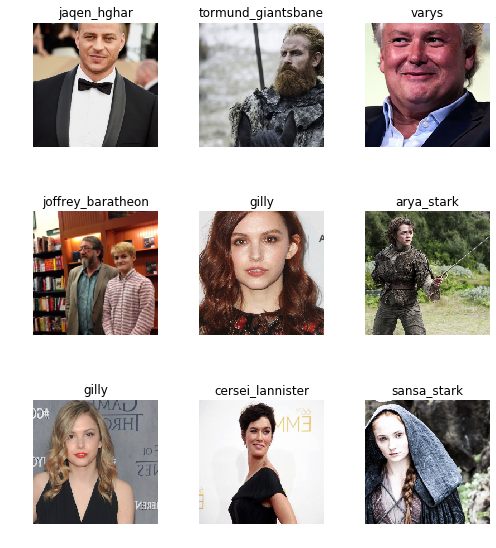

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['arya_stark',
  'bran_stark',
  'brienne_of_tarth',
  'bronn',
  'catelyn_stark',
  'cersei_lannister',
  'daario_naharis',
  'daenerys_targaryen',
  'davos_seaworth',
  'ellaria_sand',
  'gendry',
  'gilly',
  'jaime_lannister',
  'jaqen_hghar',
  'jeor_mormont',
  'joffrey_baratheon',
  'jon_snow',
  'jorah_mormont',
  'littlefinger',
  'margaery_tyrell',
  'melisandre',
  'missandei',
  'ned_stark',
  'ramsay_bolton',
  'robb_stark',
  'robert_baratheon',
  'roose_bolton',
  'samwell_tarly',
  'sansa_stark',
  'shae',
  'stannis_baratheon',
  'talisa_maegyr',
  'the_high_sparrow',
  'the_hound',
  'theon_greyjoy',
  'tommen_baratheon',
  'tormund_giantsbane',
  'tyrion_lannister',
  'tywin_lannister',
  'varys',
  'viserys_targaryen',
  'ygritte'],
 42,
 3511,
 860)

Training!

In [30]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "//anaconda/envs/got/lib/python3.6/site-packages/fastai/basic_train.py", line 189, in __del__
    def __del__(self): del(self.model, self.data)
AttributeError: model


TypeError: __init__() got an unexpected keyword argument 'num_workers'

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate


RuntimeError: DataLoader worker (pid 13272) is killed by signal: Unknown signal: 0. 